# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [ ]:
y.shape

(20640,)

In [ ]:
y_test.shape

(4128,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [ ]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

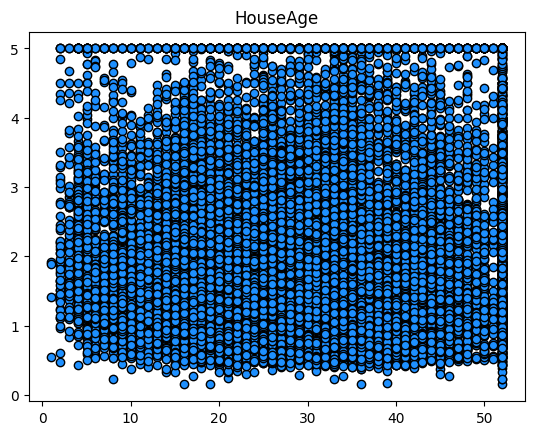

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
# The target variable (y) is the median house value for California districts,
# expressed in hundreds of thousands of dollars ($100,000).

feature = 'HouseAge'
selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'HouseAge')
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()



In [ ]:
california['feature_names'][1] == feature

True

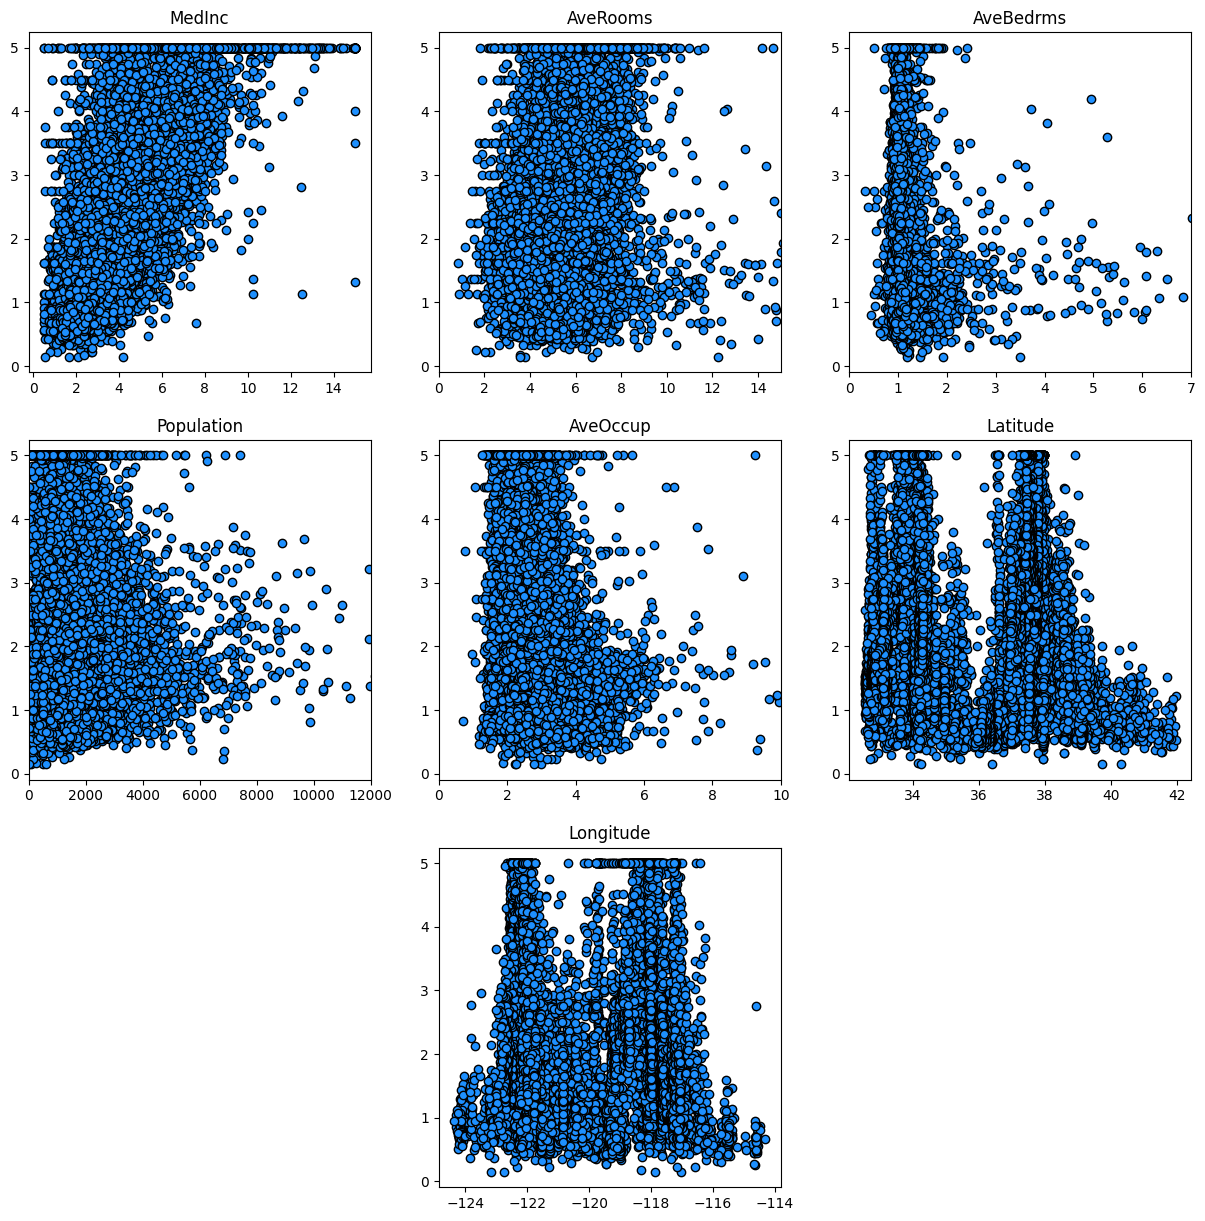

In [ ]:
figure, axis = plt.subplots(3,3,figsize=(15,15))

##############################################################
feature = 'MedInc'
selector = (np.array(california['feature_names']) == feature)
axis[0,0].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axis[0,0].set_title(feature)

##############################################################
feature = 'AveRooms'
selector = (np.array(california['feature_names']) == feature)
axis[0,1].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")

#acorto el dominio para eliminar los outliners
axis[0,1].set_xlim([0,15])

axis[0,1].set_title(feature)

##############################################################
feature = 'AveBedrms'
selector = (np.array(california['feature_names']) == feature)
axis[0,2].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")

#acorto el dominio para eliminar los outliners
axis[0,2].set_xlim([0,7])

axis[0,2].set_title(feature)

##############################################################
feature = 'Population'
selector = (np.array(california['feature_names']) == feature)
axis[1,0].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")

#acorto el dominio para eliminar los outliners
axis[1,0].set_xlim([0,12000])

axis[1,0].set_title(feature)

##############################################################
feature = 'AveOccup'
selector = (np.array(california['feature_names']) == feature)
axis[1,1].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")

#acorto el dominio para eliminar los outliners
axis[1,1].set_xlim([0,10])

axis[1,1].set_title(feature)

##############################################################
feature = 'Latitude'
selector = (np.array(california['feature_names']) == feature)
axis[1,2].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axis[1,2].set_title(feature)

##############################################################
feature = 'Longitude'
selector = (np.array(california['feature_names']) == feature)
axis[2,1].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axis[2,1].set_title(feature)

##############################################################
axis[2,0].set_visible(False)
axis[2,2].set_visible(False)
plt.show()

**3. Responder aca**

Haciendo un analisis superficial se puede ver que los atributos con mayor correlacion con el atributo objetivo serian, en orden de importancia:

* MedInc
* AveRooms
* AveBedrms

Los atributos de latidud y longitud deberian ser analizados en conjunto, dado a que son atributos correlacionados entre si. Para ver esto se puede realizar un grafico conjunto usando la Longitud y Latitud como coordenadas para analizar el valor del target.

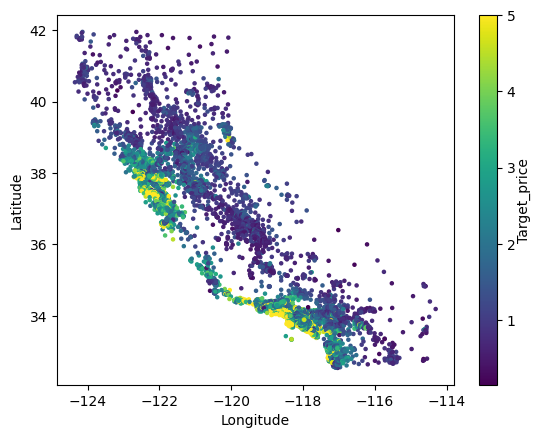

In [ ]:
feature = 'Latitude'
selector = (np.array(california['feature_names']) == feature)
latitude_arr = X[:,selector].transpose()[0]

feature = 'Longitude'
selector = (np.array(california['feature_names']) == feature)
longitude_arr = X[:,selector].transpose()[0]

min_y = y.min()
max_y = y.max()

plt.scatter(longitude_arr, latitude_arr, 5, c=y, vmin=min_y, vmax=max_y)
cbar = plt.colorbar()
cbar.set_label('Target_price', labelpad=+1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Se puede ver que el valor del taget esta condicionado por la Latitud y Longitud del bloque, por lo que estas variables deben ser analizadas en conjunto para entrenar un modelo.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Resolver acá. Ayuda:
# Seleccionamos AveRooms dado a que con MedInc introduciria un sesgo

feature = 'AveRooms'  # selecciono el atributo 'AveRooms'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector].T[0] #Si no se le agrega el .T[0] nos da una matriz de matrices nx1
X_test_f = X_test[:, selector].T[0]
X_train_f.shape, X_test_f.shape
print(X_train_f)

[7.72307692 5.32662192 4.66847826 ... 3.64122137 4.54059829 3.9295302 ]


In [ ]:
# 2. Instanciar y entrenar acá.

# Como tenemos que K=1, necesitamos agregar un bias para construir la regrecion lineal
# Utilizo las funciones del teorico
def linear_least_squares(X, y):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

def f(X, w):
    X_b = np.stack((X, np.ones(X.shape[0])), axis=1)  # add bias: (1, x)
    return X_b.dot(w)

w = linear_least_squares(X_train_f, y_train)


In [ ]:
print(X_train_f.shape)
print(y_train.shape)

(16512,)
(16512,)


In [ ]:
# 3. Predecir y evaluar acá.
#Usamos la función mean_squared_error de scikit-learn
from sklearn.metrics import mean_squared_error

y_train_pred = f(X_train_f, w)
y_test_pred = f(X_test_f, w)

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 1.306455
Val error: 1.278284


Vemos que ademas de tener errores muy parecidos entre los datos de validacion y los de entrenamiento



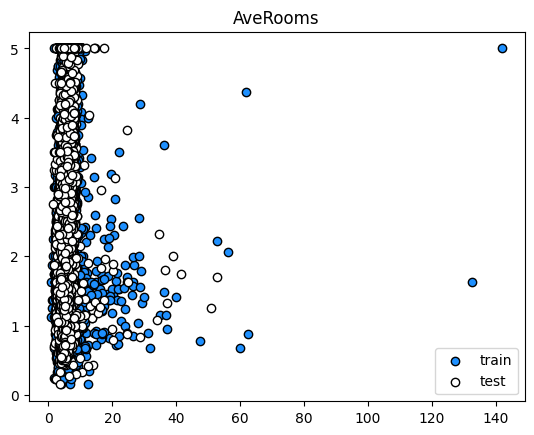

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

In [ ]:
X_train_f_curated = X_train_f
sorted = np.sort(X_train_f)[::-1]
top = sorted[:2]
top1_i = np.where(X_train_f == top[0])
top2_i = np.where(X_train_f == top[1])
X_train_f_curated = np.delete(X_train_f_curated, [top1_i, top2_i])


y_train_curated = y_train
y_train_curated = np.delete(y_train_curated, [top1_i, top2_i])

print(np.sort(X_train_f_curated)[::-1])
print(np.sort(X_train_f)[::-1])


[62.42222222 61.8125     59.875      ...  1.          0.88888889
  0.84615385]
[141.90909091 132.53333333  62.42222222 ...   1.           0.88888889
   0.84615385]


In [ ]:
w_curated = linear_least_squares(X_train_f_curated, y_train_curated)

y_train_pred_curated = f(X_train_f_curated, w_curated)
y_test_pred_curated = f(X_test_f, w_curated)

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 1.306455
Val error: 1.278284


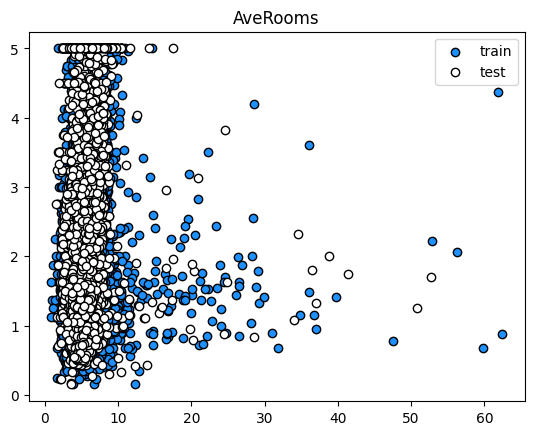

In [ ]:
x_start = min(np.min(X_train_f_curated), np.min(X_test_f))
x_end = max(np.max(X_train_f_curated), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.scatter(X_train_f_curated, y_train_curated, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

Sin estos 2 outliers del conjunto de entrenamiento vemos que tenemos un gráfico mucho mas compacto y en donde los puntos de nuestro modelo exceptuando algunos valores se acomodan a los datos de validacion.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

**1.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)

    feature = 'AveRooms'  # seleccionamos el atributo 'AveRooms'
    selector = (np.array(california['feature_names']) ==  feature)
    X_train_f = X_train[:, selector].T[0] #Si no se le agrega el .T[0] nos da una matriz de matrices nx1
    X_test_f = X_test[:, selector].T[0]

    X_train_f = X_train_f.reshape(-1, 1)
    X_test_f = X_test_f.reshape(-1, 1)

    model.fit(X_train_f, y_train)

    # predict:
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_test_f)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)
    print((degree, train_error, val_error))

(0, 1.3383715004003633, 1.3043431479307854)
(1, 1.3064547851023929, 1.2782843665673935)
(2, 1.2786785654415391, 1.2689241420356614)
(3, 1.2394585627056143, 1.2277454544399342)
(4, 1.2304254058541284, 1.2244778650762767)
(5, 1.2252104247342321, 1.2261304949124805)
(6, 1.2208774467295702, 1.2265878051450438)
(7, 1.1998083768821417, 1.20627335772046)
(8, 1.2174708723334096, 1.2217002906364967)
(9, 1.585634267033007, 1.6571375154714845)


**2.**

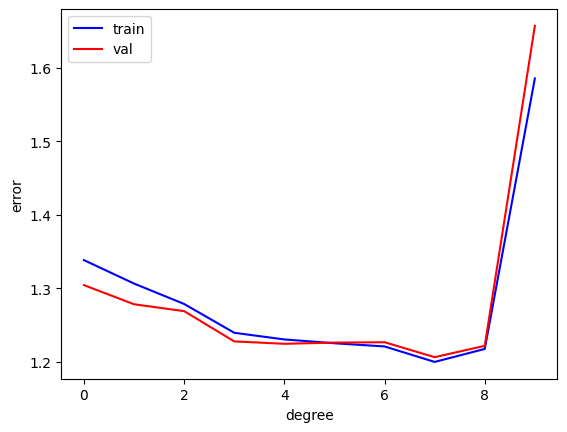

In [ ]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

**3.**
Podemos ver que aumentar el grado del polinomio mejora la estimacion del modelo hasta el grado 7. Mas alla del grado 7 podemos ver que tanto el error de estimacion comienza a aumentar tanto en la muestra de entrenamiento como en la muestra de validacion.
De la grafica del error de estimacion no se puede concluir que exista overfitting ya que los errores son muy similares para todos los grados del polinomio hasta el grado maximo que tomamos en cuenta.

**4.**

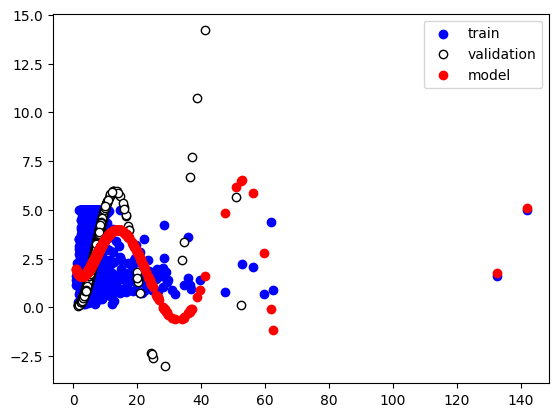

In [ ]:
degree = 7
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)
model = make_pipeline(pf, lr)

selector = (np.array(california['feature_names']) ==  feature)
X_feature = X[:, selector].T[0]
X_train_f = X_train[:, selector].T[0] #Si no se le agrega el .T[0] nos da una matriz de matrices nx1
X_test_f = X_test[:, selector].T[0]

X_train_f = X_train_f.reshape(-1, 1)
X_test_f = X_test_f.reshape(-1, 1)

model.fit(X_train_f, y_train)

plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_val_pred, color="white", edgecolor="k", label="validation")
plt.scatter(X_feature, model.predict(X_feature.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

**5.** Analizando el resultado final del modelo podemos ver que exite algo de overfitting ya que si bien la gran mayoria de los datos se encuentran en casas con menos de 20 habitacions en promedio, nuestro modelo tambien esta tratando de predecir valores que podrian considerarse como outliers (como las casas con 130-140 habitaciones en promedio)
Por como estan distribuidos los datos, usar un modelo polinomial para hacer la regresion no parece optimo, una posibilidad podría ser utilizar algun modelo donde puedan definirse "areas", como por ejemplo arboles de decision

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'HouseAge') | (np.array(california['feature_names']) == 'AveRooms')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((16512, 2), (4128, 2))

In [ ]:
# 2. Resolver acá.
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)

    selector = (np.array(california['feature_names']) == 'MedInc') | (np.array(california['feature_names']) == 'AveRooms')
    X_train_f = X_train[:, selector]
    X_test_f = X_test[:, selector]

    model.fit(X_train_f, y_train)

    # predict:
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_test_f)

    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)
    print((degree, train_error, val_error))

(0, 1.3383715004003633, 1.3043431479307854)
(1, 0.6890305711895538, 0.7101927490883555)
(2, 0.6655213598802162, 0.6943082191575737)
(3, 0.6359913311302113, 0.6544953603079948)
(4, 0.6216004926735733, 0.6377846780855286)
(5, 0.6135598051026332, 0.633672521515944)
(6, 0.6094159535376841, 0.6312088372126948)
(7, 0.6165925274186607, 0.6639625738519611)
(8, 16.608464481502473, 818.2652145513488)
(9, 29.087835389657634, 977.5350904858586)


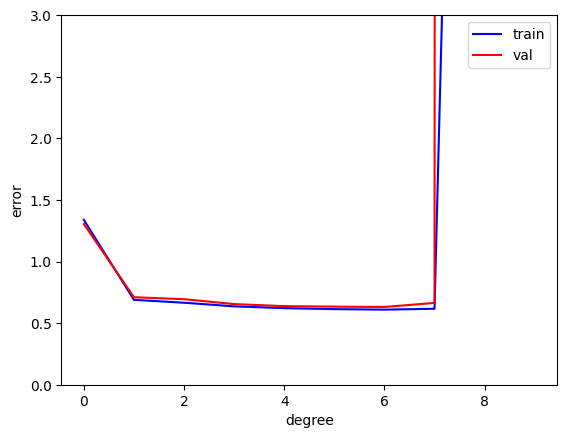

In [ ]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.ylim(0, 3)
plt.show()

**3. Responder acá.**

*   Los resultados obtenidos sumando la variable "MedInc" son mejores que si sólo se considera la variable "AveRooms". Esto es así porque los errores, tanto en la muestra de testeo como en la de validación, son menores para cada número de grados del polinomio. En este caso, el mínimo se alcanza para un grado igual a 6. Al igual que en el primer modelo, más allá del grado 7 los errores incrementan abruptamente.
*   Tiene sentido que usar más de una variable minimice en mayor medida el error, dado que la misma provee mayor poder explicativo. Se podría corroborar si adiciones sucesivas derivan en el mismo resultado.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
